In [1]:
import shap
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
import matplotlib.pyplot as plt 
# plt.rcParams['axes.unicode_minus'] = False 
import seaborn as sns
# import matplotlib
# matplotlib.rcParams['font.family']='SimHei'#黑体'STSong'仿宋
warnings.filterwarnings("ignore")
shap.initjs()  # notebook环境下，加载用于可视化的JS代码
# 参考https://blog.csdn.net/xieyan0811/article/details/120393090

In [2]:
# shap.force_plot需要把参数matplotlib=True
# 瀑布图直接调pyplot的savefig就可以
# shap.decision_plot则需要传入参数return_objects=True

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
f_top=['Age',
 'Primary_Site',
 'Grade',
 'Histology',
 'N',
 'Surgery',
 'Radiation_Recode',
 'Chemotherapy',
 'Brain_Metastasis',
 'Liver_Metastasis',
 'Lung_Metastasis',
 'Laterality']

In [5]:
import pandas as pd
train=pd.read_csv("Training cohort.csv",index_col=0)
train['label']=train['Bone_Metastasis']
valid=pd.read_csv("Validation cohort.csv",index_col=0)
valid['label']=valid['Bone_Metastasis']
X=train[f_top]
y=train['label']

In [6]:
xgb = XGBClassifier()
xgb.fit(train[f_top],train['label'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

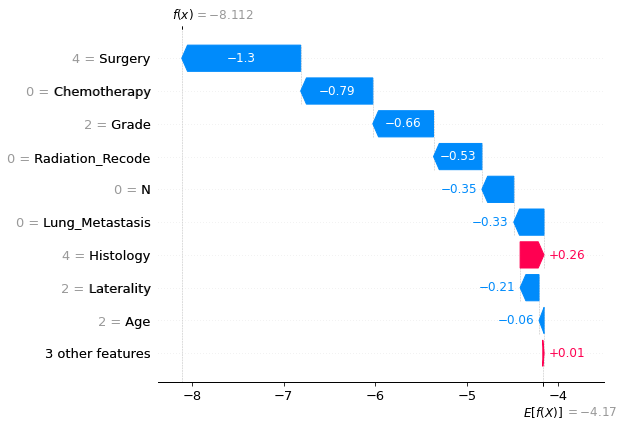

In [7]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.TreeExplainer(xgb)
shap_values1 = explainer(X)
shap_values2 = explainer.shap_values(X) 
# visualize the first prediction's explanation
# plt.rcParams['axes.unicode_minus'] = False 
shap.plots.waterfall(shap_values1[0],show=False)
plt.savefig('waterfall.png',dpi=100, bbox_inches = 'tight')
plt.show()

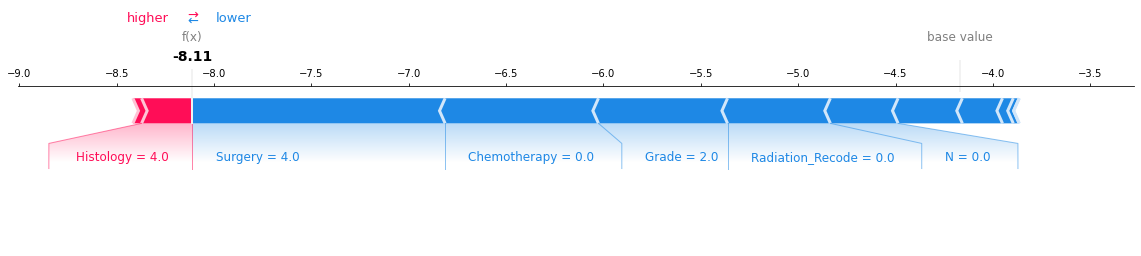

In [8]:
# 可视化第一个prediction的解释   如果不想用JS,传入matplotlib=True
shap.force_plot(explainer.expected_value, shap_values2[0,:], X.iloc[0,:],matplotlib=True,show=False)
plt.savefig('force_plot.png',dpi=200, bbox_inches = 'tight')
plt.show()

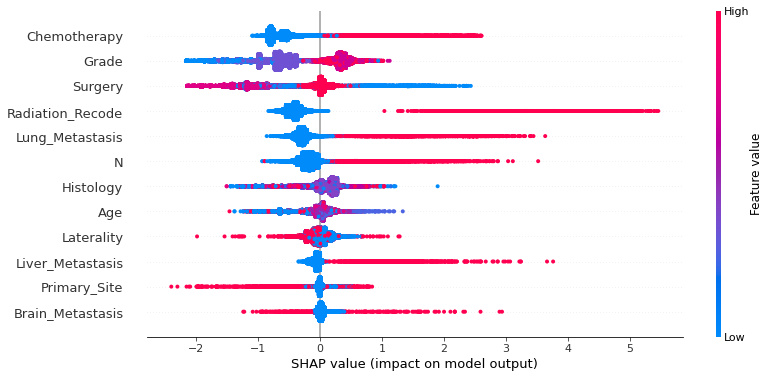

In [9]:
# summarize the effects of all the features
shap.summary_plot(shap_values2, X,plot_size=(12,6))

In [10]:
# shap.dependence_plot('age', shap_values2, X, interaction_index=None, show=False)
# shap.dependence_plot('age', shap_values2, X, interaction_index='N_stage', show=True)
# shap.force_plot(explainer.expected_value, shap_values2, X)
# shap.plots.bar(shap_values1)
# shap.plots.force(explainer.expected_value, shap_values1.values[:10])